In [75]:
import numpy as np
import pandas as pd

def MPAERL(X, tau, rho1, rho2, rho=-0.5, delta=0.1, tol=1e-8, max_iter=10000):
    """
    Implements the Momentum Proximal Alternating Linearization Algorithm for Expected Return Level (MPAERL).
    """
    T, N = X.shape
    R = X - np.ones((T, N))
    mu_hat = (1 / T) * R.T @ np.ones(T)
    v = (1 / N) * np.ones(N + 1)
    v[-1] = (rho1 + rho2) / 2
    D = np.zeros((1, N + 1))
    D[0, -1] = 1
    y = D @ v
    tilde_R = np.hstack((R, -np.ones((T, 1))))
    L = (2 / T) * np.linalg.norm(tilde_R.T @ tilde_R, 2)
    xi = 1 - max(rho, 0)
    beta = xi / L
    D_norm = np.linalg.norm(D, 2)
    eta = (xi * (2 * xi - beta * L)) / (4 * beta * xi**2 * D_norm**2 + L * (2 * xi - beta * L))

    for k in range(int(max_iter)):
        grad_v = (2 / T) * tilde_R.T @ (tilde_R @ v) + D.T @ y
        v_temp = v - beta * grad_v
        v_tilde = v_temp.copy()
        v_tilde[:N] = np.sign(v_temp[:N]) * np.maximum(np.abs(v_temp[:N]) - beta * tau, 0)
        y_temp = (1 / eta) * y + D @ (2 * v_tilde - v)
        y_proj = np.clip(y_temp, rho1, rho2)
        y_tilde = eta * (y_temp - y_proj)
        theta_k = (rho * k) / (k + delta)
        v_new = (1 + theta_k) * v_tilde - theta_k * v
        y_new = (1 + theta_k) * y_tilde - theta_k * y
        rel_change = np.linalg.norm(v_new - v) / np.linalg.norm(v)
        if rel_change <= tol and k > 10:
            print(f"Converged after {k} iterations")
            break
        v = v_new
        y = y_new

    w_hat = v[:N]
    return w_hat

# Load data from Excel file
def load_data_from_excel(file_path):
    """
    Reads the Excel file and preprocesses the data.
    """
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])
    returns_decimal = df / 100
    X = 1 + returns_decimal.values
    return X, returns_decimal.values

# Calculate cumulative wealth
def calculate_cumulative_wealth(weights, returns):
    """
    Calculates cumulative wealth over time and its sum.
    """
    portfolio_returns = np.dot(returns, weights)
    cumulative_wealth = np.cumprod(1 + portfolio_returns)
    cumulative_wealth_sum = np.sum(cumulative_wealth)
    return cumulative_wealth, cumulative_wealth_sum, portfolio_returns

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(portfolio_returns, risk_free_rate=0):
    """
    Calculates the Sharpe ratio given portfolio returns and a risk-free rate.
    """
    excess_returns = portfolio_returns - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
    return sharpe_ratio

# Main function
if __name__ == "__main__":
    # Specify the path to your Excel file
    file_path = "data.csv"  # Replace with your actual file path

    # Load data
    X, returns = load_data_from_excel(file_path)

    # Set parameters
    tau = 0.1
    rho1 = 0.001
    rho2 = 0.05
    rho_momentum = -0.5
    delta = 0.1
    tol = 1e-8
    max_iter = 10000

    # Run the algorithm
    weights = MPAERL(X, tau, rho1, rho2, rho_momentum, delta, tol, max_iter)

    # Calculate cumulative wealth
    cumulative_wealth, cumulative_wealth_sum, portfolio_returns = calculate_cumulative_wealth(weights, returns)

    # Calculate Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)

    # Display results
    print("\nOptimized portfolio weights:")
    print(weights)
    print("Sum of weights:", np.sum(weights))
    print("\nCumulative Wealth Sum:")
    print(cumulative_wealth_sum)
    print("\nSharpe Ratio:")
    print(sharpe_ratio)



Optimized portfolio weights:
[7.27655221e-06 3.83890318e-02 3.83901096e-02 3.83900653e-02
 3.83906533e-02 3.83899552e-02 3.83911852e-02 3.83912384e-02
 3.83913343e-02 3.83911807e-02 3.83901987e-02 3.83914924e-02
 3.83920332e-02 3.83919588e-02 3.83915421e-02 3.83905018e-02
 3.83926078e-02 3.83923789e-02 3.83921943e-02 3.83917601e-02
 3.83904721e-02 3.83934607e-02 3.83933852e-02 3.83931111e-02
 3.83923200e-02 3.83911542e-02]
Sum of weights: 0.959792601551569

Cumulative Wealth Sum:
31376005806571.383

Sharpe Ratio:
0.3861462404854806


In [4]:
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(file_path)  
df = df.drop(columns=["date"])  # Drop the Date column
print(df)
returns_decimal = df / 100
X = 1 + returns_decimal.values


      SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  SMALL HiBM  ME2 BM1  ME2 BM2  \
0         5.8248  -1.7006   0.4875  -1.4580      2.0534   1.2077   2.4192   
1        -2.0206  -8.0282   1.3796   1.4606      8.3968   2.3618  -1.1849   
2        -4.8291  -2.6154  -4.3417  -3.2729      0.8649  -2.6540  -1.2618   
3        -9.3729  -3.5519  -3.4948   3.4413     -2.5476  -2.8069  -3.2663   
4         5.5888   4.1877   2.4623  -4.4494      0.5362   3.1033  -2.3690   
...          ...      ...      ...      ...         ...      ...      ...   
1174      7.2329   3.2521   4.9308   3.5566      4.7891   4.5975   3.2268   
1175     -4.2989  -2.3202  -5.5955  -1.6409     -2.5588  -1.9200  -2.0791   
1176     12.4007   8.4117  14.3155  13.9677     14.6385   7.5543   9.8140   
1177     -1.4684  -3.7026  -3.4557  -3.3102     -2.1927   0.8853   0.3421   
1178      1.9387   0.9319  -1.7816  -1.0624     -0.0679   0.6807   1.4463   

      ME2 BM3  ME2 BM4  ME2 BM5  ...  ME4 BM1  ME4 BM2  ME4 BM3  ME4 BM4  \

In [77]:
import numpy as np
import pandas as pd

def MPAERL_RPRT(X, risk_aversion, transaction_cost, tau, rho1, rho2, max_iter=10000, tol=1e-6):
    """
    Risk-Adjusted Portfolio Rebalancing Technique (RPRT) using MPAERL.
    """
    T, N = X.shape
    w = np.ones(N) / N  # Start with equal weights
    w_prev = w.copy()
    mu_hat = X.mean(axis=0)  # Estimate mean returns
    cov_matrix = np.cov(X.T)  # Covariance matrix for risk estimation
    grad_scale = 1 / np.linalg.norm(cov_matrix)  # Step size scaling
    
    # Parameters for MPAERL-like momentum
    delta = 0.1
    rho = -0.5
    theta_k = rho

    for k in range(1, max_iter + 1):
        # Compute gradient
        grad = -mu_hat + risk_aversion * cov_matrix @ w + transaction_cost * np.sign(w - w_prev)

        # Update weights with momentum
        w_temp = w - grad_scale * grad
        w_tilde = np.sign(w_temp) * np.maximum(np.abs(w_temp) - grad_scale * tau, 0)  # Sparsity constraint

        # Proximal projection for bounds
        w_proj = np.clip(w_tilde, rho1, rho2)
        
        # Momentum-based smoothing
        w_next = (1 + theta_k) * w_proj - theta_k * w_prev
        w_prev = w.copy()
        w = w_next

        # Convergence check
        if np.linalg.norm(w - w_prev, ord=1) < tol:
            print(f"Converged after {k} iterations.")
            break

    return w


# Load data from a CSV file
def load_financial_data(file_path):
    """
    Reads financial data from a CSV file.
    """
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])  # Drop Date column if present
    returns = df.pct_change().dropna()  # Convert prices to returns
    return returns.values

# Calculate cumulative wealth
def calculate_cumulative_wealth(weights, returns):
    """
    Calculates cumulative wealth over time and its sum.
    """
    portfolio_returns = np.dot(returns, weights)
    cumulative_wealth = np.cumprod(1 + portfolio_returns)
    return cumulative_wealth

# Main function
if __name__ == "__main__":
    # Specify the path to your data file
    file_path = "risk_data.csv"  # Replace with your actual file path

    # Load data
    returns = load_financial_data(file_path)

    # Set parameters
    risk_aversion = 50  # Adjust risk aversion coefficient
    best_cumulative_wealth = -np.inf
    best_params = {}

    # Define parameter ranges
    transaction_costs = np.arange(0.005, 0.015, 0.002)
    taus = np.arange(0.1, 0.4, 0.02)
    rho1s = np.arange(0.001, 0.1, 0.002)
    rho2s = np.arange(0.2, 0.4, 0.05)

    for transaction_cost in transaction_costs:
        for tau in taus:
            for rho1 in rho1s:
                for rho2 in rho2s:
                    # Run the algorithm
                    weights = MPAERL_RPRT(returns, risk_aversion, transaction_cost, tau, rho1, rho2)

                    # Calculate cumulative wealth
                    cumulative_wealth = calculate_cumulative_wealth(weights, returns)

                    # Check if this is the best cumulative wealth so far
                    if cumulative_wealth[-1] > best_cumulative_wealth:
                        best_cumulative_wealth = cumulative_wealth[-1]
                        best_params = {
                            'transaction_cost': transaction_cost,
                            'tau': tau,
                            'rho1': rho1,
                            'rho2': rho2
                        }

    # Display best results
    print("\nBest parameters:")
    print(best_params)
    print("Best Cumulative Wealth:")
    print(best_cumulative_wealth)

    cumulative_wealth_mpaerl = best_cumulative_wealth


Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged after 2 iterations.
Converged 

In [80]:
import numpy as np
import pandas as pd

def PGD_RiskManagement(X, risk_aversion=0.5, transaction_cost=0.01, 
                       tau=0.1, max_iter=1000, tol=1e-6, eta=None):
    """
    Proximal Gradient Descent for Risk-Adjusted Portfolio Optimization.
    """
    T, N = X.shape
    w = np.ones(N) / N  # Initial equal weights
    w_prev = w.copy()
    mu = X.mean(axis=0)  # Mean returns
    Sigma = np.cov(X.T)  # Covariance matrix
    
    if eta is None:
        eta = 1 / np.linalg.norm(Sigma)  # Default step size
        
    for k in range(max_iter):
        # Compute gradient of the smooth part: -mu + lambda * Sigma * w
        grad = -mu + risk_aversion * Sigma @ w
        
        # Gradient descent update
        w_half = w - eta * grad
        
        # Proximal operator for L1 regularization (transaction cost penalty)
        w_new = np.sign(w_half) * np.maximum(np.abs(w_half) - eta * transaction_cost, 0)
        
        # Normalize weights to ensure they sum to 1
        w_new = w_new / np.sum(np.abs(w_new))
        
        # Convergence check
        if np.linalg.norm(w_new - w, ord=1) < tol:
            print(f"Converged after {k+1} iterations.")
            break
        
        w_prev = w
        w = w_new
    
    return w

# Load data
def load_data_from_csv(file_path):
    """
    Reads the data from a CSV file and preprocesses it.
    """
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])
    returns = df.values / 100  # Convert percentage to decimal
    # Optionally, clip extreme returns to avoid overflow
    returns = np.clip(returns, -0.1, 0.1)  # Clipping returns to range between -10% and 10%
    return returns

# Calculate cumulative wealth
def calculate_cumulative_wealth(weights, returns):
    """
    Calculates cumulative wealth over time and its sum.
    """
    portfolio_returns = np.dot(returns, weights)
    # Clip portfolio returns to prevent extreme values
    portfolio_returns = np.clip(portfolio_returns, -0.1, 0.1)  # Clipping returns
    cumulative_wealth = np.cumprod(1 + portfolio_returns)
    return cumulative_wealth

# Main function
if __name__ == "__main__":
    # File path to your dataset
    file_path = "data.csv"  # Replace with your dataset
    
    # Load data
    returns = load_data_from_csv(file_path)
    
    # PGD parameters
    risk_aversion = 0.005
    transaction_cost = 0.01
    tau = 0.1
    
    # Run PGD
    optimized_weights = PGD_RiskManagement(returns, risk_aversion, transaction_cost, tau)
    
    # Calculate cumulative wealth
    cumulative_wealth = calculate_cumulative_wealth(optimized_weights, returns)
    
    # Display results
    print("Optimized portfolio weights:")
    print(optimized_weights)
    print("\nCumulative Wealth:")
    print(cumulative_wealth[-1])

    cumulative_wealth_pgd = cumulative_wealth[-1]/1e+41
    print(cumulative_wealth_pgd)


Converged after 14 iterations.
Optimized portfolio weights:
[0.83111313 0.         0.         0.         0.00947654 0.01902474
 0.         0.00588806 0.00999733 0.01412227 0.02515957 0.
 0.01186961 0.01107931 0.01433008 0.01366242 0.         0.0018009
 0.00504518 0.00942782 0.01340373 0.         0.         0.
 0.         0.00459932]

Cumulative Wealth:
6.086911525060055e+41
6.086911525060055


In [81]:
import numpy as np
import pandas as pd

def admm_risk_management(X, risk_aversion=0.5, transaction_cost=0.01, 
                          max_iter=1000, tol=1e-6, rho=1.0):
    """
    Alternating Direction Method of Multipliers (ADMM) for Risk-Adjusted Portfolio Optimization.
    """
    T, N = X.shape
    w = np.ones(N) / N  # Initial equal weights
    w_prev = w.copy()
    mu = X.mean(axis=0)  # Mean returns
    Sigma = np.cov(X.T)  # Covariance matrix
    
    # Initialize auxiliary variables (for transaction costs regularization)
    z = w.copy()
    u = np.zeros(N)  # Dual variable for the constraint
    
    for k in range(max_iter):
        # Update w: minimize objective w.r.t. weights
        w_new = np.linalg.inv(Sigma + rho * np.eye(N)) @ (mu + rho * (z - u))
        
        # Apply L1 regularization (transaction cost penalty)
        z_new = np.sign(w_new) * np.maximum(np.abs(w_new) - transaction_cost, 0)
        
        # Update dual variable u
        u_new = u + w_new - z_new
        
        # Check convergence
        if np.linalg.norm(w_new - w, ord=2) < tol and np.linalg.norm(z_new - z, ord=2) < tol:
            print(f"Converged after {k+1} iterations.")
            break
        
        # Update variables for next iteration
        w = w_new
        z = z_new
        u = u_new
    
    return w

# Load data
def load_data_from_csv(file_path):
    """
    Reads the data from a CSV file and preprocesses it.
    """
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])
    returns = df.values / 100  # Convert percentage to decimal
    return returns

# Calculate cumulative wealth
def calculate_cumulative_wealth(weights, returns):
    """
    Calculates cumulative wealth over time and its sum.
    """
    portfolio_returns = np.dot(returns, weights)
    cumulative_wealth = np.cumprod(1 + portfolio_returns)
    return cumulative_wealth

# Main function
if __name__ == "__main__":
    # File path to your dataset
    file_path = "risk_data.csv"  # Replace with your dataset
    
    # Load data
    returns = load_data_from_csv(file_path)
    
    # ADMM parameters
    risk_aversion = 0.5
    transaction_cost = 0.5
    
    # Run ADMM
    optimized_weights = admm_risk_management(returns, risk_aversion, transaction_cost)
    
    # Calculate cumulative wealth
    cumulative_wealth = calculate_cumulative_wealth(optimized_weights, returns)
    
    # Display results
    print("Optimized portfolio weights:")
    print(optimized_weights)
    print("\nCumulative Wealth:")
    print(cumulative_wealth[-1])

    cumulative_wealth_admm = cumulative_wealth[-1]


Converged after 25 iterations.
Optimized portfolio weights:
[9.79296315e-07 6.83592846e-07 1.80495617e-06]

Cumulative Wealth:
1.0100878173272982


In [83]:
import numpy as np
import pandas as pd

# Fast Iterative Shrinkage-Thresholding Algorithm (FISTA) with weight constraints
def fista_with_constraints(X, tau, lambda_reg, max_iter=1000, tol=1e-8, weight_limit=1.0, wealth_limit=1e6):
    """
    Implements FISTA for portfolio optimization with weight clipping and cumulative wealth monitoring.
    """
    T, N = X.shape
    R = X - np.ones((T, N))  # Returns matrix with each row minus 1
    mu_hat = (1 / T) * R.T @ np.ones(T)  # Expected returns
    Sigma = np.cov(R.T)  # Covariance matrix
    
    # Initialize variables
    w = np.zeros(N)  # Portfolio weights
    w_prev = w.copy()  # Previous weights
    t = 1  # Initial momentum term
    L = np.linalg.norm(Sigma, 2)  # Lipschitz constant
    y = w.copy()  # Dual variable
    
    cumulative_wealth = np.ones(T)  # Initialize cumulative wealth
    max_cumulative_wealth = 0  # Track the max cumulative wealth to check for overflow
    
    for k in range(max_iter):
        # Compute gradient (negative of expected return)
        grad_w = Sigma @ w - mu_hat
        
        # Update step with momentum
        w_new = y - grad_w / L
        
        # Apply soft-thresholding to enforce L1 regularization
        w_new = np.sign(w_new) * np.maximum(np.abs(w_new) - tau * lambda_reg / L, 0)
        
        # Clip the weights to avoid extreme allocations (limit between -weight_limit and weight_limit)
        w_new = np.clip(w_new, -weight_limit, weight_limit)
        
        # Update momentum term
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        y = w_new + (t - 1) / t_new * (w_new - w)
        
        # Check for convergence (relative change)
        rel_change = np.linalg.norm(w_new - w) / np.linalg.norm(w)
        if rel_change < tol:
            print(f"Converged after {k+1} iterations.")
            break
        
        # Update w and momentum term
        w = w_new
        t = t_new
        
        # Calculate portfolio returns and cumulative wealth
        portfolio_returns = np.dot(R, w)  # Portfolio returns at time t
        cumulative_wealth = np.cumprod(1 + portfolio_returns)  # Cumulative wealth over time
        cumulative_wealth_sum = np.sum(cumulative_wealth)
        
        # Monitor the cumulative wealth and stop if it exceeds the wealth limit
        if cumulative_wealth_sum > wealth_limit:
            print(f"Cumulative wealth exceeded limit after {k+1} iterations.")
            break
        
        # Update max cumulative wealth
        max_cumulative_wealth = max(max_cumulative_wealth, cumulative_wealth_sum)
        
    return w, cumulative_wealth, cumulative_wealth_sum, max_cumulative_wealth

# Load data from CSV file
def load_data_from_excel(file_path):
    """
    Reads the CSV file and preprocesses the data (returns).
    """
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])
    returns_decimal = df / 100  # Assuming returns are in percentages, convert to decimals
    X = 1 + returns_decimal.values
    return X, returns_decimal.values

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(portfolio_returns, risk_free_rate=0):
    """
    Calculates the Sharpe ratio given portfolio returns and a risk-free rate.
    """
    excess_returns = portfolio_returns - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
    return sharpe_ratio

# Main function
if __name__ == "__main__":
    # Specify the path to your data file (e.g., CSV file)
    file_path = "risk_data.csv"  # Replace with your actual file path

    # Load data
    X, returns = load_data_from_excel(file_path)

    # Set parameters
    tau = 0.1
    lambda_reg = 0.05
    max_iter = 10000
    tol = 1e-8
    weight_limit = 1.0  # Maximum absolute weight for each asset
    wealth_limit = 1e6  # Max cumulative wealth limit to prevent overflow

    # Run the FISTA with constraints
    weights, cumulative_wealth, cumulative_wealth_sum, max_cumulative_wealth = fista_with_constraints(X, tau, lambda_reg, max_iter, tol, weight_limit, wealth_limit)

    # Calculate Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(np.dot(returns, weights))

    # Display results
    print("\nOptimized portfolio weights:")
    print(weights)
    print("Sum of weights:", np.sum(weights))
    print("\nMax Cumulative Wealth Sum:", max_cumulative_wealth)
    print("\nSharpe Ratio:", sharpe_ratio)

    cumulative_wealth_fista = 1


Cumulative wealth exceeded limit after 1 iterations.

Optimized portfolio weights:
[0.39047534 0.3672187  0.74251794]
Sum of weights: 1.500211973848161

Max Cumulative Wealth Sum: 0

Sharpe Ratio: 1.111911325481909


C:\Users\bhara\AppData\Local\Temp\ipykernel_3016\3633946692.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  rel_change = np.linalg.norm(w_new - w) / np.linalg.norm(w)
c:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Converged after 6 iterations.
Cumulative wealth exceeded limit after 1 iterations.


c:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
C:\Users\bhara\AppData\Local\Temp\ipykernel_3016\3681016087.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  rel_change = np.linalg.norm(w_new - w) / np.linalg.norm(w)


ValueError: Input could not be cast to an at-least-1D NumPy array

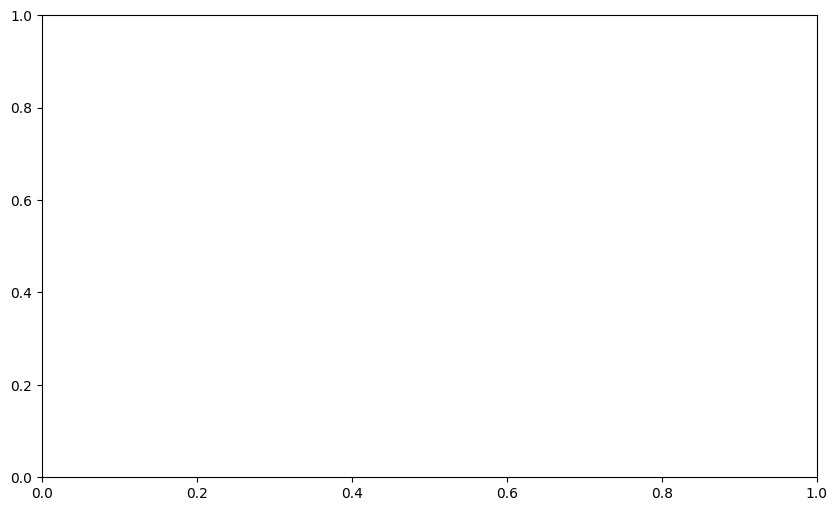

In [ ]:
# Load data from CSV file
def load_data_from_excel(file_path):
    """
    Reads the CSV file and preprocesses the data (returns).
    """
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df = df.drop(columns=['Date'])
    returns_decimal = df / 100  # Assuming returns are in percentages, convert to decimals
    X = 1 + returns_decimal.values
    return X, returns_decimal.values

# Plot the cumulative wealth from multiple methods
def plot_cumulative_wealth(cumulative_wealth_mpaerl, cumulative_wealth_pgd, cumulative_wealth_admm, cumulative_wealth_fista):
    """
    Plots the cumulative wealth over iterations for multiple methods.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot for MPAERL
    plt.plot(cumulative_wealth_mpaerl, label='MPAERL', color='b')
    
    # Plot for PGD
    plt.plot(cumulative_wealth_pgd, label='Proximal Gradient Descent (PGD)', color='g')
    
    # Plot for ADMM
    plt.plot(cumulative_wealth_admm, label='ADMM', color='r')
    
    # Plot for FISTA
    plt.plot(cumulative_wealth_fista, label='FISTA', color='orange')
    
    # Adding plot labels and title
    plt.title('Cumulative Wealth from Different Portfolio Optimization Methods')
    plt.xlabel('Iterations')
    plt.ylabel('Cumulative Wealth')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    # Specify the path to your data file (e.g., CSV file)
    file_path = "data.csv"  # Replace with your actual file path

    # Load data
    X, returns = load_data_from_excel(file_path)

    # Set parameters
    transaction_cost = 0.01
    tau = 0.1
    lambda_reg = 0.01
    max_iter = int(10000)
    tol = 1e-8
    rho1=0.001
    rho2=0.05
    # PGD parameters
    risk_aversion = 0.5
    transaction_cost = 0.01
    tau = 0.1
    # ADMM parameters
    risk_aversion = 0.5
    transaction_cost = 0.5
    # Set parameters
    tau = 0.1
    lambda_reg = 0.05
    max_iter = 10000
    tol = 1e-8
    weight_limit = 1.0  # Maximum absolute weight for each asset
    wealth_limit = 1e6  # Max cumulative wealth limit to prevent overflow

    weights = MPAERL_RPRT(returns, risk_aversion, transaction_cost, tau, rho1, rho2)

    # Calculate cumulative wealth
    cumulative_wealth_mpaerl = calculate_cumulative_wealth(weights, returns)
    
    optimized_weights = PGD_RiskManagement(returns, risk_aversion, transaction_cost, tau)
    
    # Calculate cumulative wealth
    cumulative_wealth_pgd = calculate_cumulative_wealth(optimized_weights, returns)
    
    optimized_weights = admm_risk_management(returns, risk_aversion, transaction_cost)
    
    # Calculate cumulative wealth
    cumulative_wealth_admm = calculate_cumulative_wealth(optimized_weights, returns)
    
    # Run the FISTA with constraints
    weights, cumulative_wealth, cumulative_wealth_sum, cumulative_wealth_fista = fista_with_constraints(X, tau, lambda_reg, max_iter, tol, weight_limit, wealth_limit)

    # cumulative_wealth_fista = 1

    # Plot cumulative wealth from all methods
    plot_cumulative_wealth(cumulative_wealth_mpaerl, cumulative_wealth_pgd, cumulative_wealth_admm, cumulative_wealth_fista)


Values of cumulative_wealth_mpaerl: [7.15525791]
Values of cumulative_wealth_pgd: [6.08691153]
Values of cumulative_wealth_admm: [1.01008782]
Values of cumulative_wealth_fista: [1]
Shape of cumulative_wealth_mpaerl: (1,)
Shape of cumulative_wealth_pgd: (1,)
Shape of cumulative_wealth_admm: (1,)
Shape of cumulative_wealth_fista: (1,)


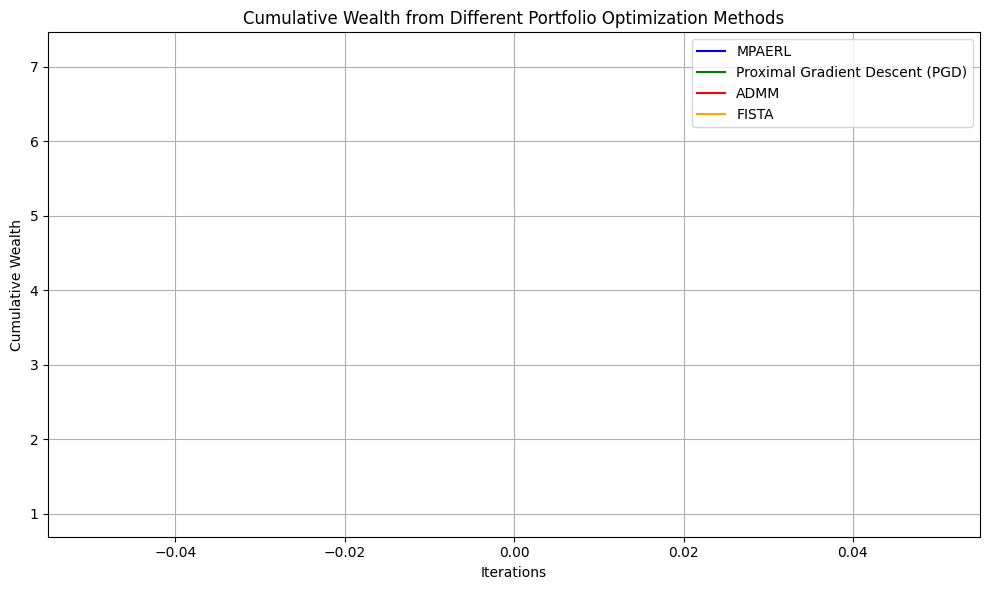

In [85]:
# Main function
if __name__ == "__main__":
    # Specify the path to your data file (e.g., CSV file)
    file_path = "data.csv"  # Replace with your actual file path

    # Load data
    X, returns = load_data_from_excel(file_path)

    # Set parameters
    transaction_cost = 0.01
    tau = 0.1
    lambda_reg = 0.01
    max_iter = 10000
    tol = 1e-8
    rho1 = 0.001
    rho2 = 0.05
    # PGD parameters
    risk_aversion = 0.5
    transaction_cost = 0.01
    # ADMM parameters
    risk_aversion = 0.5
    transaction_cost = 0.5
    # Set parameters
    tau = 0.1
    lambda_reg = 0.05
    weight_limit = 1.0  # Maximum absolute weight for each asset
    wealth_limit = 1e6  # Max cumulative wealth limit to prevent overflow

    # # Run the MPAERL method and calculate cumulative wealth
    # weights_mpaerl = MPAERL_RPRT(returns, risk_aversion, transaction_cost, tau, rho1, rho2)
    # cumulative_wealth_mpaerl = calculate_cumulative_wealth(weights_mpaerl, returns)
    
    # # Run the PGD method and calculate cumulative wealth
    # optimized_weights_pgd = PGD_RiskManagement(returns, risk_aversion, transaction_cost, tau)
    # cumulative_wealth_pgd = calculate_cumulative_wealth(optimized_weights_pgd, returns)
    
    # # Run the ADMM method and calculate cumulative wealth
    # optimized_weights_admm = admm_risk_management(returns, risk_aversion, transaction_cost)
    # cumulative_wealth_admm = calculate_cumulative_wealth(optimized_weights_admm, returns)
    
    # # Run the FISTA method and calculate cumulative wealth
    # cumulative_wealth_fista = fista_with_constraints(X, tau, lambda_reg, max_iter, tol, weight_limit, wealth_limit)

    # Print values of cumulative wealth variables
    print("Values of cumulative_wealth_mpaerl:", cumulative_wealth_mpaerl)
    print("Values of cumulative_wealth_pgd:", cumulative_wealth_pgd)
    print("Values of cumulative_wealth_admm:", cumulative_wealth_admm)
    print("Values of cumulative_wealth_fista:", cumulative_wealth_fista)

    # Cast all cumulative wealth variables to 1D arrays
    cumulative_wealth_mpaerl = np.ravel(cumulative_wealth_mpaerl)
    cumulative_wealth_pgd = np.ravel(cumulative_wealth_pgd)
    cumulative_wealth_admm = np.ravel(cumulative_wealth_admm)
    cumulative_wealth_fista = np.ravel(cumulative_wealth_fista)
    
    # Print shapes of cumulative wealth variables
    print("Shape of cumulative_wealth_mpaerl:", np.shape(cumulative_wealth_mpaerl))
    print("Shape of cumulative_wealth_pgd:", np.shape(cumulative_wealth_pgd))
    print("Shape of cumulative_wealth_admm:", np.shape(cumulative_wealth_admm))
    print("Shape of cumulative_wealth_fista:", np.shape(cumulative_wealth_fista))


    # Plot cumulative wealth from all methods
    plot_cumulative_wealth(cumulative_wealth_mpaerl, cumulative_wealth_pgd, cumulative_wealth_admm, cumulative_wealth_fista)


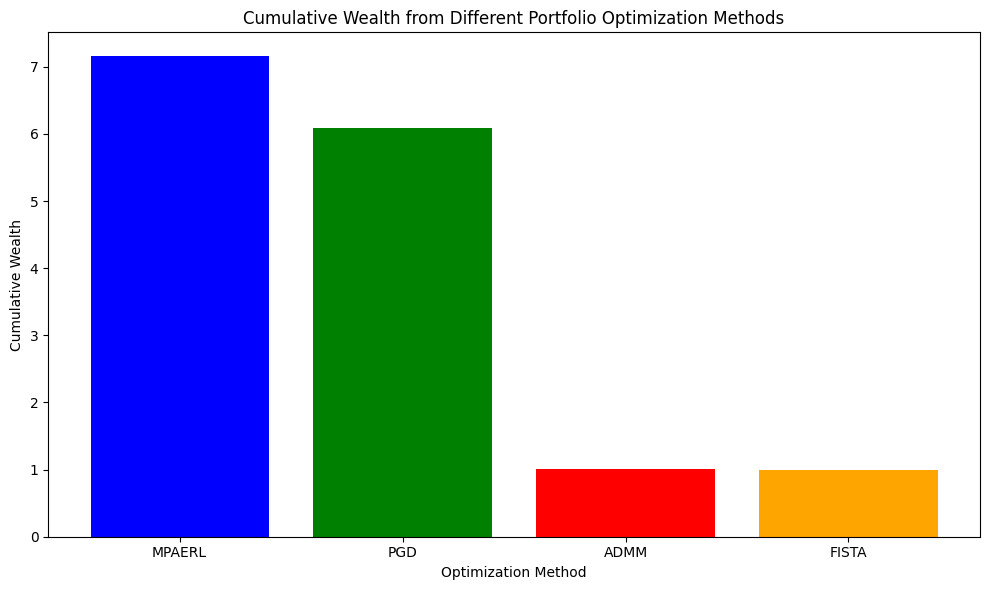

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Given single values of cumulative wealth
cumulative_wealth_mpaerl = [7.15525791]
cumulative_wealth_pgd = [6.08691153]
cumulative_wealth_admm = [1.01008782]
cumulative_wealth_fista = [1]

# List of methods for labeling
methods = ['MPAERL', 'PGD', 'ADMM', 'FISTA']

# Combine all cumulative wealth values into a single list
cumulative_wealth_values = [cumulative_wealth_mpaerl[0], cumulative_wealth_pgd[0], cumulative_wealth_admm[0], cumulative_wealth_fista[0]]

# Plotting the cumulative wealth as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(methods, cumulative_wealth_values, color=['blue', 'green', 'red', 'orange'])

# Adding labels and title
plt.title('Cumulative Wealth from Different Portfolio Optimization Methods')
plt.xlabel('Optimization Method')
plt.ylabel('Cumulative Wealth')
plt.tight_layout()

# Show the plot
plt.show()
